<a href="https://colab.research.google.com/github/joooser/TENSORFLOW2/blob/main/Tumor_classiffier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/TumorClassification.zip \
    -O /tmp/platzi-tf2/TumorClassification.zip

--2022-06-18 02:54:59--  https://storage.googleapis.com/platzi-tf2/TumorClassification.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 2607:f8b0:4023:c0d::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7460028 (7.1M) [application/zip]
Saving to: ‘/tmp/platzi-tf2/TumorClassification.zip’

/tmp/platzi-tf2/Tum 100%[===================>]   7.11M  --.-KB/s    in 0.04s   

2022-06-18 02:55:00 (187 MB/s) - ‘/tmp/platzi-tf2/TumorClassification.zip’ saved [7460028/7460028]



In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/TumorClassification.zip \
    -O /tmp/platzi-tf2/TumorClassification.zip

--2022-06-18 02:55:00--  https://storage.googleapis.com/platzi-tf2/TumorClassification.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 2607:f8b0:4023:c0d::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7460028 (7.1M) [application/zip]
Saving to: ‘/tmp/platzi-tf2/TumorClassification.zip’

/tmp/platzi-tf2/Tum 100%[===================>]   7.11M  --.-KB/s    in 0.03s   

2022-06-18 02:55:00 (213 MB/s) - ‘/tmp/platzi-tf2/TumorClassification.zip’ saved [7460028/7460028]



In [ ]:
local_zip = "/tmp/platzi-tf2/TumorClassification.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/platzi-tf2")
zip_ref.close()

In [ ]:
initial_count = 0
dir = "/tmp/platzi-tf2/Train/NORMAL/"
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count += 1
print(initial_count)

350


In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import requests as requests
from PIL import Image
from io import BytesIO
import codecs
import json


In [ ]:
train_dir = "/tmp/platzi-tf2/Train"
test_dir = "/tmp/platzi-tf2/Test"

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split= 0.28)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (56, 56),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (56, 56),
    batch_size = 64,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (56, 56),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale"
)

Found 1050 images belonging to 3 classes.
Found 39 images belonging to 3 classes.
Found 144 images belonging to 3 classes.


In [ ]:
classes = ["BENIGN", "MALIGNANT", "NORMAL"]

In [ ]:
classes

['BENIGN', 'MALIGNANT', 'NORMAL']

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

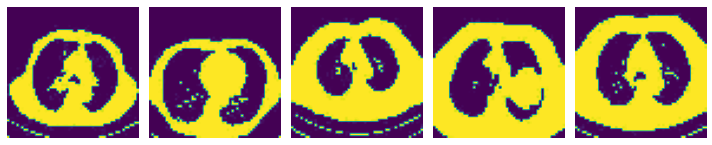

In [ ]:
sample_training_images, _= next(train_generator)
plotImages(sample_training_images[10:15])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

In [ ]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest',
)

In [ ]:
i = 0 
for batch in datagen.flow_from_directory(train_dir, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 10 == 0 :
        break

plt.show()        

ValueError: ignored

In [ ]:
model_base = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (56, 56, 1)),
              tf.keras.layers.Dense(18, activation = "relu"),
              tf.keras.layers.Dense(6, activation = "relu"),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

In [ ]:
model_base.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 3136)              0         
                                                                 
 dense_72 (Dense)            (None, 18)                56466     
                                                                 
 dense_73 (Dense)            (None, 6)                 114       
                                                                 
 dense_74 (Dense)            (None, 3)                 21        
                                                                 
Total params: 56,601
Trainable params: 56,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_base.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ['accuracy'])


history = model_base.fit(
    train_generator, 
    epochs= 20, 
    validation_data = validation_generator
)

Epoch 1/20
9/9 [==============================] - 1s 92ms/step - loss: 1.0989 - accuracy: 0.3229 - val_loss: 1.0789 - val_accuracy: 0.2821
Epoch 2/20
9/9 [==============================] - 1s 65ms/step - loss: 1.0591 - accuracy: 0.4410 - val_loss: 1.1864 - val_accuracy: 0.4103
Epoch 3/20
9/9 [==============================] - 1s 65ms/step - loss: 0.9458 - accuracy: 0.5629 - val_loss: 1.1276 - val_accuracy: 0.3846
Epoch 4/20
9/9 [==============================] - 1s 65ms/step - loss: 0.8349 - accuracy: 0.6581 - val_loss: 1.0890 - val_accuracy: 0.5385
Epoch 5/20
9/9 [==============================] - 1s 66ms/step - loss: 0.7459 - accuracy: 0.7410 - val_loss: 1.1498 - val_accuracy: 0.5641
Epoch 6/20
9/9 [==============================] - 1s 63ms/step - loss: 0.6441 - accuracy: 0.8029 - val_loss: 1.2932 - val_accuracy: 0.5385
Epoch 7/20
9/9 [==============================] - 1s 65ms/step - loss: 0.5600 - accuracy: 0.8305 - val_loss: 1.4082 - val_accuracy: 0.5897
Epoch 8/20
9/9 [===========

In [ ]:
results = model_base.evaluate(test_generator)

2/2 [==============================] - 0s 18ms/step - loss: 2.3828 - accuracy: 0.5833


In [ ]:
def visualizacion_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

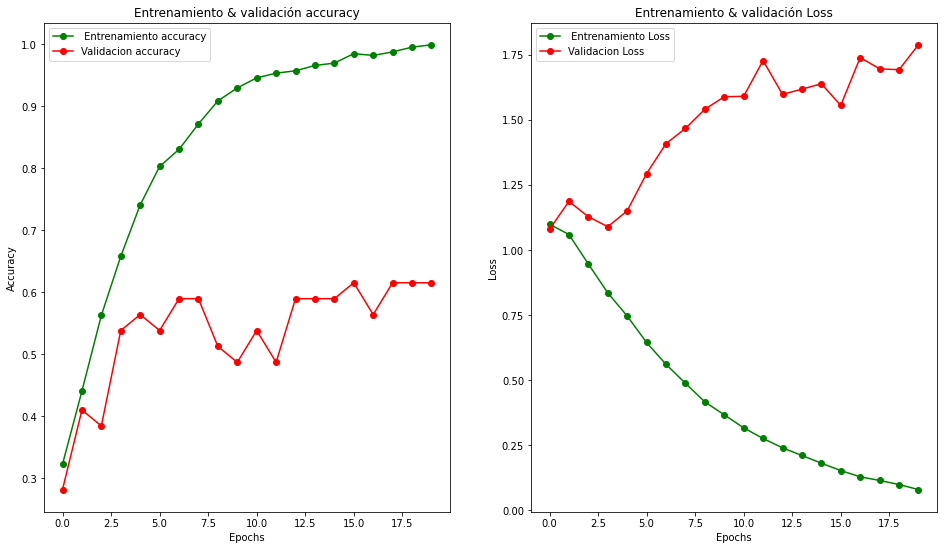

In [ ]:
visualizacion_resultados(history)

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
model_optimizer = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (56, 56, 1)),
              tf.keras.layers.Dense(12, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.3),
              tf.keras.layers.Dense(6, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_optimizer.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_64 (Flatten)        (None, 3136)              0         
                                                                 
 dense_192 (Dense)           (None, 12)                37644     
                                                                 
 dropout_98 (Dropout)        (None, 12)                0         
                                                                 
 dense_193 (Dense)           (None, 6)                 78        
                                                                 
 dropout_99 (Dropout)        (None, 6)                 0         
                                                                 
 dense_194 (Dense)           (None, 3)                 21        
                                                                 
Total params: 37,743
Trainable params: 37,743
Non-tra

In [ ]:
model_optimizer.compile(optimizer= "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 40,
    validation_data = validation_generator
)

Epoch 1/40
9/9 [==============================] - 1s 90ms/step - loss: 1.0562 - accuracy: 0.4086 - val_loss: 1.2857 - val_accuracy: 0.5897
Epoch 2/40
9/9 [==============================] - 1s 68ms/step - loss: 0.9871 - accuracy: 0.4952 - val_loss: 1.4738 - val_accuracy: 0.3846
Epoch 3/40
9/9 [==============================] - 1s 72ms/step - loss: 0.9135 - accuracy: 0.5267 - val_loss: 1.4272 - val_accuracy: 0.5385
Epoch 4/40
9/9 [==============================] - 1s 63ms/step - loss: 0.8461 - accuracy: 0.5990 - val_loss: 1.5844 - val_accuracy: 0.3846
Epoch 5/40
9/9 [==============================] - 1s 68ms/step - loss: 0.7518 - accuracy: 0.6352 - val_loss: 1.5577 - val_accuracy: 0.5128
Epoch 6/40
9/9 [==============================] - 1s 72ms/step - loss: 0.7280 - accuracy: 0.6610 - val_loss: 1.7688 - val_accuracy: 0.5128
Epoch 7/40
9/9 [==============================] - 1s 72ms/step - loss: 0.6861 - accuracy: 0.6838 - val_loss: 1.7487 - val_accuracy: 0.6154
Epoch 8/40
9/9 [===========

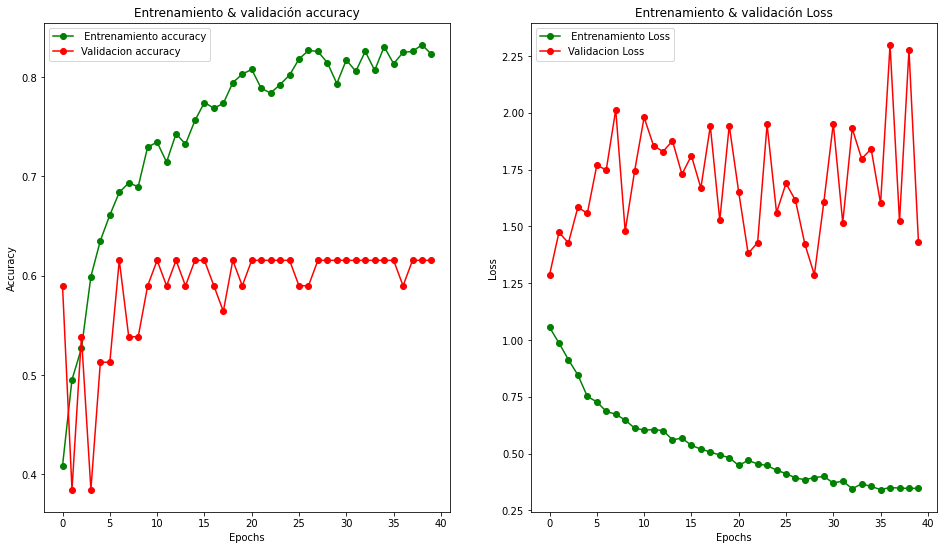

In [ ]:
def visualizacion_resultados(history):
  epochs = [i for i in range(40)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

visualizacion_resultados(history_optimizer)

convoluciones


In [ ]:
model_convolutional = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(32, (4,4), activation = "relu", input_shape= (56, 56, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.08),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.08),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_convolutional.summary()

model_convolutional.compile(optimizer= "Nadam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_convolutional = model_convolutional.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 53, 53, 32)        544       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 26, 26, 32)       0         
 g2D)                                                            
                                                                 
 flatten_32 (Flatten)        (None, 21632)             0         
                                                                 
 dense_97 (Dense)            (None, 256)               5538048   
                                                                 
 dropout_53 (Dropout)        (None, 256)               0         
                                                                 
 dense_98 (Dense)            (None, 128)               32896     
                                                     

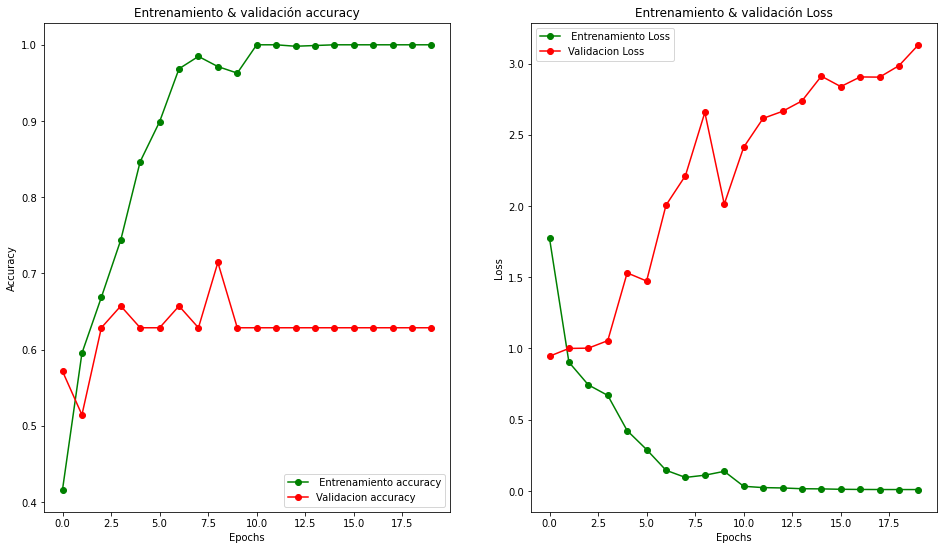

In [ ]:
visualizacion_resultados(history_convolutional)

CALLBACKS

In [ ]:
model_callback = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (56, 56, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_callback.summary()

model_callback.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 54, 54, 75)        750       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 27, 27, 75)       0         
 g2D)                                                            
                                                                 
 flatten_33 (Flatten)        (None, 54675)             0         
                                                                 
 dense_100 (Dense)           (None, 256)               13997056  
                                                                 
 dropout_55 (Dropout)        (None, 256)               0         
                                                                 
 dense_101 (Dense)           (None, 128)               32896     
                                                     

In [ ]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get("accuracy") > 0.999:
      print("Lo logramos, nuestro modelo llego a 95%, detenemos el entrenamiento")
      self.model.stop_training = True

In [ ]:
callback = TrainingCallback()

history_callback = model_callback.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback],
    validation_data = validation_generator
)

Epoch 1/20
9/9 [==============================] - 7s 799ms/step - loss: 0.3560 - accuracy: 0.8648 - val_loss: 1.4222 - val_accuracy: 0.6286
Epoch 2/20
9/9 [==============================] - 8s 815ms/step - loss: 0.2290 - accuracy: 0.9314 - val_loss: 1.5253 - val_accuracy: 0.6571
Epoch 3/20
9/9 [==============================] - 8s 846ms/step - loss: 0.1529 - accuracy: 0.9552 - val_loss: 1.5995 - val_accuracy: 0.6286
Epoch 4/20
9/9 [==============================] - 8s 817ms/step - loss: 0.1260 - accuracy: 0.9581 - val_loss: 1.8560 - val_accuracy: 0.6286
Epoch 5/20
9/9 [==============================] - 7s 813ms/step - loss: 0.0768 - accuracy: 0.9848 - val_loss: 1.8008 - val_accuracy: 0.6286
Epoch 6/20
9/9 [==============================] - 8s 891ms/step - loss: 0.0590 - accuracy: 0.9867 - val_loss: 2.0364 - val_accuracy: 0.6286
Epoch 7/20
9/9 [==============================] - 7s 804ms/step - loss: 0.0488 - accuracy: 0.9895 - val_loss: 2.1173 - val_accuracy: 0.6286
Epoch 8/20
9/9 [====

In [ ]:
def get_model():
  model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (56, 56, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
  ])
  return model

model_early = get_model()
model_early.summary()

model_early.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 54, 54, 75)        750       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 27, 27, 75)       0         
 g2D)                                                            
                                                                 
 flatten_34 (Flatten)        (None, 54675)             0         
                                                                 
 dense_103 (Dense)           (None, 256)               13997056  
                                                                 
 dropout_57 (Dropout)        (None, 256)               0         
                                                                 
 dense_104 (Dense)           (None, 128)               32896     
                                                     

early stopping

In [ ]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience=3, mode = "auto")

In [ ]:
history_early = model_early.fit(
    train_generator, 
    epochs= 20, 
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/20
9/9 [==============================] - 8s 816ms/step - loss: 1.9110 - accuracy: 0.4124 - val_loss: 1.0148 - val_accuracy: 0.6286
Epoch 2/20
9/9 [==============================] - 7s 782ms/step - loss: 0.9964 - accuracy: 0.5476 - val_loss: 0.9819 - val_accuracy: 0.5714
Epoch 3/20
9/9 [==============================] - 7s 773ms/step - loss: 0.7620 - accuracy: 0.6619 - val_loss: 0.9923 - val_accuracy: 0.6286
Epoch 4/20
9/9 [==============================] - 7s 767ms/step - loss: 0.5803 - accuracy: 0.7714 - val_loss: 1.0669 - val_accuracy: 0.6571
Epoch 5/20
9/9 [==============================] - 7s 759ms/step - loss: 0.4131 - accuracy: 0.8438 - val_loss: 1.1546 - val_accuracy: 0.6571
Epoch 6/20
9/9 [==============================] - 7s 750ms/step - loss: 0.3038 - accuracy: 0.9067 - val_loss: 1.4134 - val_accuracy: 0.6571
Epoch 7/20
9/9 [==============================] - 7s 802ms/step - loss: 0.2044 - accuracy: 0.9324 - val_loss: 1.6763 - val_accuracy: 0.6286
Epoch 8/20
9/9 [====

## Creamos nuestra modelo funcional con Auto Tunner Keras

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner as kt
from tensorflow import keras

     |████████████████████████████████| 133 kB 4.2 MB/s 


In [ ]:
def constructor_modelos(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(64, (3,3), activation= "relu", input_shape = (56, 56, 1)))
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.Flatten())

  hp_units = hp.Int("units", min_value = 32, max_value = 512, step = 32)
  model.add(tf.keras.layers.Dense(units=hp_units,activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(128,activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(len(classes), activation = "softmax"))

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate),loss = "categorical_crossentropy", metrics = ["accuracy"])

  return model

In [ ]:
tuner = kt.Hyperband(
    constructor_modelos,
    objective = "val_accuracy",
    max_epochs = 30,
    factor = 3,
    directory = "models/",
    project_name = "tunner")

In [ ]:
tuner.search(train_generator, epochs =50, validation_data = validation_generator)

best_hps = tuner.get_best_hyperparameters(num_trials =5)[0]

Trial 65 Complete [00h 00m 53s]
val_accuracy: 0.34285715222358704

Best val_accuracy So Far: 0.6857143044471741
Total elapsed time: 00h 30m 43s
INFO:tensorflow:Oracle triggered exit


In [ ]:
print(best_hps.get("units"))

416


In [ ]:
print(best_hps.get("learning_rate"))

0.001


In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

history_hypermodel = hypermodel.fit(
    train_generator,
    epochs = 50,
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/50
17/17 [==============================] - 10s 505ms/step - loss: 1.9500 - accuracy: 0.4352 - val_loss: 0.9268 - val_accuracy: 0.5000
Epoch 2/50
17/17 [==============================] - 8s 491ms/step - loss: 0.9453 - accuracy: 0.5590 - val_loss: 0.9132 - val_accuracy: 0.5714
Epoch 3/50
17/17 [==============================] - 8s 488ms/step - loss: 0.5894 - accuracy: 0.7505 - val_loss: 1.6189 - val_accuracy: 0.6429
Epoch 4/50
17/17 [==============================] - 8s 507ms/step - loss: 0.2978 - accuracy: 0.8990 - val_loss: 1.4495 - val_accuracy: 0.6429
Epoch 5/50
17/17 [==============================] - 8s 485ms/step - loss: 0.1377 - accuracy: 0.9629 - val_loss: 1.8069 - val_accuracy: 0.6429
Epoch 6/50
17/17 [==============================] - 8s 480ms/step - loss: 0.0661 - accuracy: 0.9895 - val_loss: 2.1124 - val_accuracy: 0.7143
Epoch 7/50
17/17 [==============================] - 8s 484ms/step - loss: 0.0434 - accuracy: 0.9924 - val_loss: 2.1083 - val_accuracy: 0.6786
Epoch

## Guardar únicamente arquitectura del modelo

In [ ]:
config_dict = hypermodel.get_config()

In [ ]:
print(config_dict)

{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_input'}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d', 'trainable': True, 'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'filters': 75, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}}, {'class_

## Crear un nuevo modelo desde la arquitectura

In [ ]:
model_same_config = tf.keras.Sequential.from_config(config_dict)

In [ ]:
model_same_config.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 75)        750       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 75)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12675)             0         
_________________________________________________________________
dense (Dense)                (None, 416)               5273216   
_________________________________________________________________
dropout (Dropout)            (None, 416)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               53376     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

## Guardar y cargar unicamente los pesos


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model_weight = get_model()
model_weight.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 75)        750       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 75)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12675)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               3245056   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
model_weight.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# Creamos unos checkpoint de nuestros modelos con TensorFlow, verbose: mostrar mas información
checkpoint_path = "model_checpoints/checkpoint"
checkpoint_weighs= ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = "epoch",
    save_weights_only = True,
    verbose = 1

)

In [ ]:
# Entrenamos el modelo, y almacenamos en cada steps los pesos del moedelo.
history_weight = model_weight.fit(
    train_generator,
    epochs = 20,
    callbacks = [checkpoint_weighs],
    validation_data = validation_generator
)


Epoch 1/20
215/215 [==============================] - 11s 47ms/step - loss: 1.7043 - accuracy: 0.4836 - val_loss: 0.8059 - val_accuracy: 0.7123

Epoch 00001: saving model to model_checpoints/checkpoint
Epoch 2/20
215/215 [==============================] - 10s 47ms/step - loss: 0.3778 - accuracy: 0.8881 - val_loss: 0.5769 - val_accuracy: 0.8140

Epoch 00002: saving model to model_checpoints/checkpoint
Epoch 3/20
215/215 [==============================] - 10s 46ms/step - loss: 0.1463 - accuracy: 0.9660 - val_loss: 0.5455 - val_accuracy: 0.8309

Epoch 00003: saving model to model_checpoints/checkpoint
Epoch 4/20
215/215 [==============================] - 10s 47ms/step - loss: 0.0828 - accuracy: 0.9861 - val_loss: 0.5555 - val_accuracy: 0.8428

Epoch 00004: saving model to model_checpoints/checkpoint
Epoch 5/20
215/215 [==============================] - 10s 46ms/step - loss: 0.0626 - accuracy: 0.9904 - val_loss: 0.6465 - val_accuracy: 0.8302

Epoch 00005: saving model to model_checpoints/c